## 加载数据

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. 数据加载
data = pd.read_csv('chemical_dataset.csv')
data

,Volatility,Corrosiveness,Stability
0,-5.117289,1.667329,1.305212
1,5.923159,-1.053945,8.215860
2,6.379619,-0.540920,8.696563
3,-4.885130,2.692237,2.103920
4,3.841756,-0.055422,9.074408
...,...,...,...
995,9.367441,6.894705,-6.635717
996,9.855231,5.407512,-5.423024
997,10.590288,6.478434,-6.316395
998,7.772118,-0.076130,11.754895


## 可视化原始数据

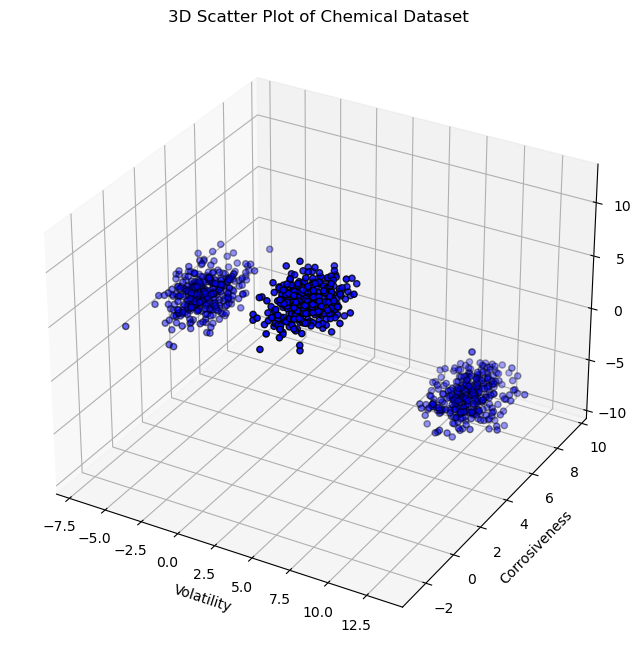

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 从CSV文件加载数据集
df = pd.read_csv('./chemical_dataset.csv')

# 定义一个函数来可视化数据集
def visualize_dataset(df):
    # 从DataFrame中提取数据
    X = df.values

    # 创建一个3D散点图
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 使用前三个特征（挥发性，腐蚀性，稳定性）进行绘制散点图
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', marker='o', edgecolor='k')

    # 设置轴标签
    ax.set_xlabel('Volatility')
    ax.set_ylabel('Corrosiveness')
    ax.set_zlabel('Stability')

    # 设置图表标题
    plt.title('3D Scatter Plot of Chemical Dataset')

    # 显示图表
    plt.show()

# 调用函数进行数据可视化
visualize_dataset(df)


## 机器学习

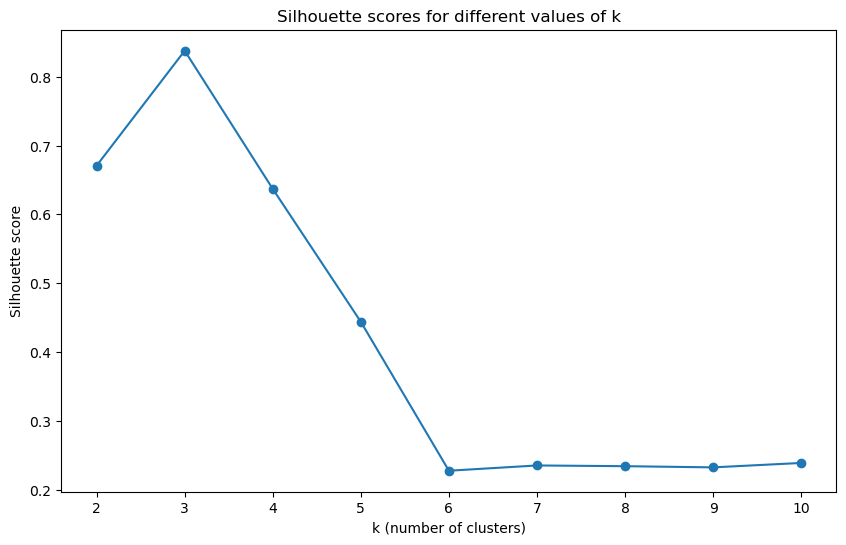

The best k value is 3 with a silhouette score of 0.84


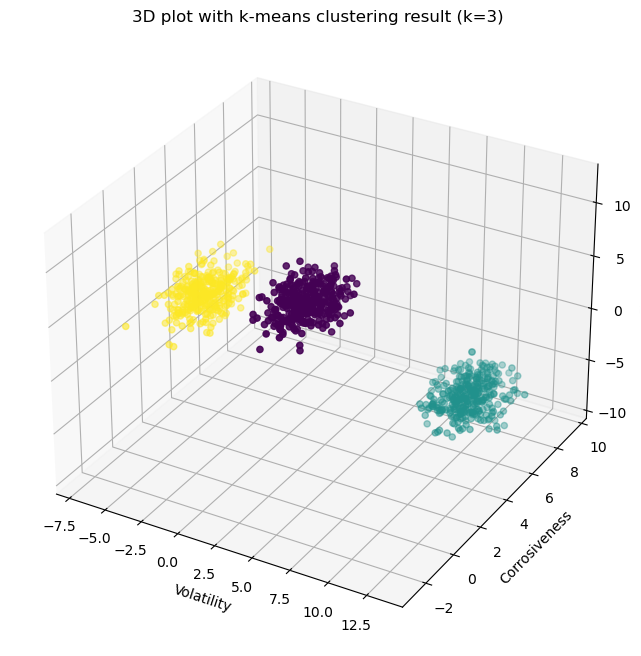

In [7]:
# Since the execution state has been reset, we need to re-import necessary libraries and reload the dataset.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reload the dataset
df = pd.read_csv('./chemical_dataset.csv')
X = df.values

# Function to conduct k-means clustering with different values of k and evaluate
def k_means_clustering_and_evaluation(X):
    # Range of k values to try
    k_values = range(2, 11)
    silhouette_scores = []
    models = []

    # Perform KMeans clustering for different values of k and calculate silhouette scores
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = kmeans.labels_
        models.append(kmeans)
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot silhouette scores to determine the best k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, 'o-')
    plt.title('Silhouette scores for different values of k')
    plt.xlabel('k (number of clusters)')
    plt.ylabel('Silhouette score')
    plt.show()

    # Choose the best k and print the model evaluation
    best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts from 2
    best_kmeans = models[best_k - 2]
    print(f"The best k value is {best_k} with a silhouette score of {max(silhouette_scores):.2f}")

    # Visualization of the clustering result for the best k
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=best_kmeans.labels_, cmap='viridis', marker='o')
    ax.set_title(f'3D plot with k-means clustering result (k={best_k})')
    ax.set_xlabel('Volatility')
    ax.set_ylabel('Corrosiveness')
    ax.set_zlabel('Stability')
    plt.show()

    return best_kmeans

# Run the k-means clustering and evaluation
best_model = k_means_clustering_and_evaluation(X)